In [241]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pickle


In [242]:
df = pd.read_csv('Car details v3.csv')

In [243]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [245]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [246]:
df['mileage'] = df['mileage'].str[:4]

In [247]:
df['engine'] = df['mileage'].str[:4]

In [248]:
df['max_power'] = df['max_power'].str[:-4]

In [249]:
df.drop(['name','torque'], axis=1, inplace=True)

In [250]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,23.4,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,21.1,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,17.7,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,23.0,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,16.1,88.2,5.0


In [251]:
df.describe(include='all')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7907.000000
unique,NaN,NaN,NaN,4,3,2,5,173,173,321,NaN
top,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9,18.9,74,NaN
freq,NaN,NaN,NaN,4402,6766,7078,5289,225,225,377,NaN
mean,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [252]:
df['mileage'] = df['mileage'].astype(float)

In [253]:
df['engine'] = df['engine'].astype(float)


In [254]:
df['max_power'] = df['max_power'].replace('','0')

In [255]:
df['max_power'] = df['max_power'].astype(float)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7913 non-null   float64
 10  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 698.6+ KB


In [257]:
df['mileage'] = df['mileage'].fillna(df['mileage'].mean())
df['engine'] = df['engine'].fillna(df['engine'].mean())
df['max_power'] = df['max_power'].fillna(df['max_power'].mean())
df['seats'] = df['seats'].fillna(5.0)

In [258]:
df.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [259]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,23.4,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,21.1,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,17.7,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,23.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,16.1,88.20,5.0


In [260]:
df['fuel'] = [0 if x == 'Diesel' else 1 if x == 'Petrol' else 2 if x == 'LPG' else 3 for x in df['fuel']]

In [261]:
df['seller_type'] = [0 if x == 'Individual' else 1 if x == 'Dealer' else 2 for x in df['seller_type']]

In [262]:
df['transmission'] = [0 if x == 'Manual' else 1 for x in df['transmission']]

In [263]:
df['owner'] = [0 if x == 'First Owner' else 1 if x == 'Second Owner' else 2 if x == 'Third Owner' else 3 if x == 'Fourth & Above Owner' else 4 for x in df['owner']]

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int64  
 4   seller_type    8128 non-null   int64  
 5   transmission   8128 non-null   int64  
 6   owner          8128 non-null   int64  
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   float64
 9   max_power      8128 non-null   float64
 10  seats          8128 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 698.6 KB


In [265]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [266]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,0,0,0,23.4,23.4,74.00,5.0
1,2014,370000,120000,0,0,0,1,21.1,21.1,103.52,5.0
2,2006,158000,140000,1,0,0,2,17.7,17.7,78.00,5.0
3,2010,225000,127000,0,0,0,0,23.0,23.0,90.00,5.0
4,2007,130000,120000,1,0,0,0,16.1,16.1,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,0,0,0,18.5,18.5,82.85,5.0
8124,2007,135000,119000,0,0,0,3,16.8,16.8,110.00,5.0
8125,2009,382000,120000,0,0,0,0,19.3,19.3,73.90,5.0
8126,2013,290000,25000,0,0,0,0,23.5,23.5,70.00,5.0


In [267]:
x = df.drop('selling_price', axis=1)
x

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,0,0,0,0,23.4,23.4,74.00,5.0
1,2014,120000,0,0,0,1,21.1,21.1,103.52,5.0
2,2006,140000,1,0,0,2,17.7,17.7,78.00,5.0
3,2010,127000,0,0,0,0,23.0,23.0,90.00,5.0
4,2007,120000,1,0,0,0,16.1,16.1,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,1,0,0,0,18.5,18.5,82.85,5.0
8124,2007,119000,0,0,0,3,16.8,16.8,110.00,5.0
8125,2009,120000,0,0,0,0,19.3,19.3,73.90,5.0
8126,2013,25000,0,0,0,0,23.5,23.5,70.00,5.0


In [268]:
y = df['selling_price']
y[5571]

1150000

In [269]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [270]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [271]:
prediction = lr.predict(X_train)

In [272]:
error_score = r2_score(y_train, prediction)
print("R2 error is: ", error_score)

R2 error is:  0.6600819087072125


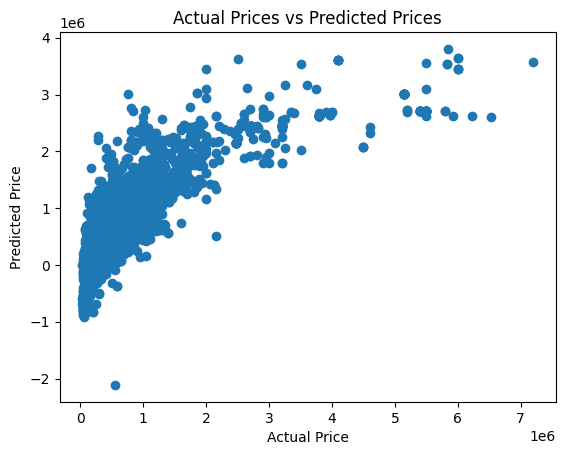

In [273]:
plt.scatter(y_train, prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [274]:
prediction_test = lr.predict(X_test)

In [275]:
error_score = r2_score(y_test, prediction_test)
print("R2 error is: ", error_score)

R2 error is:  0.7025919172386887


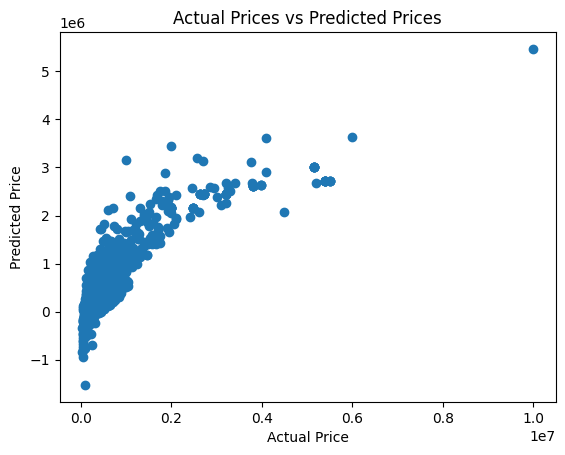

In [276]:
plt.scatter(y_test, prediction_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [277]:
ls = Lasso()
ls.fit(X_train,y_train)

Lasso()

In [278]:
prediction_ls = ls.predict(X_train)

In [279]:
error_score = r2_score(y_train, prediction_ls)
print("R2 error is: ", error_score)

R2 error is:  0.6600819086639959


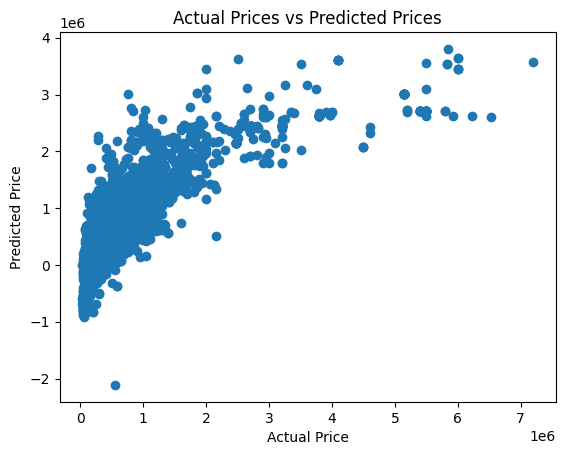

In [280]:
plt.scatter(y_train, prediction_ls)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [281]:
prediction_ls_test = ls.predict(X_test)

In [282]:
error_score = r2_score(y_test, prediction_ls_test)
print("R2 error is: ", error_score)

R2 error is:  0.7025922721810729


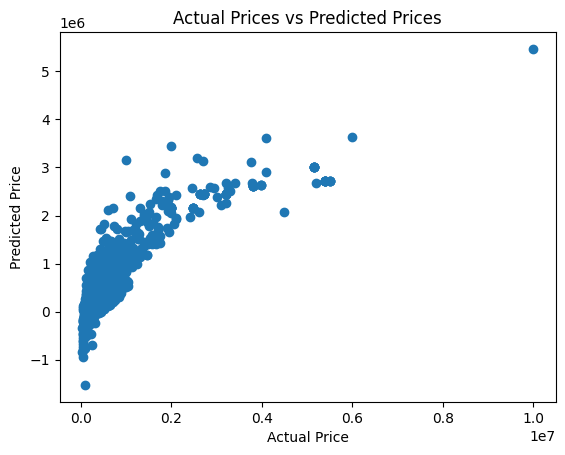

In [283]:
plt.scatter(y_test, prediction_ls_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [284]:
pickle.dump(ls,open('model.pkl','wb'))

In [289]:
x.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')